# Importing the usual libraries

In [223]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Getting the webpage and parsing it through BeautifulSoup

In [8]:
url='https://www.imdb.com/title/tt7016936/episodes?year=2018&ref_=ttep_ep_yr_pv'
r=requests.get(url)
soup=BeautifulSoup(r.text,'html.parser')
results=soup.find_all('div',attrs={'class':'info'})

In [10]:
first_result=results[0]

# Retrieving the main information for each show

In [361]:
#Air date
first_result.find('div',attrs={'class':'airdate'}).text.strip()

'13 Apr. 2020'

In [21]:
#Episode Title
first_result.find('strong').text

'Nice Face'

In [34]:
first_result.find_all('span')[1].text

'8.7'

In [38]:
first_result.find_all('span')[2].text

'(3,932)'

In [43]:
first_result.find('div',attrs={'class':"item_description"}).text.strip()

'When a Russian politician is murdered, a bored MI5 security officer is tasked with protecting the only witness and soon finds herself on a collision course with a violent and extraordinary assassin.'

# Creating a couple of foor loops to retrieve the information of all episodes across several pages

In [51]:
records=[]
pages=np.arange(2018,2021)
for page in pages:
    
    page='https://www.imdb.com/title/tt7016936/episodes?year='+ str(page) + '&ref_=ttep_ep_yr_pv'
    r=requests.get(page)
    soup=BeautifulSoup(r.text,'html.parser')
    results=soup.find_all('div',attrs={'class':'info'})
    first_result=results[0]
    



    for result in results:
        date=result.find('div',attrs={'class':'airdate'}).text.strip()
        title=result.find('strong').text
        rating=result.find_all('span')[1].text
        total_votes=result.find_all('span')[2].text
        description=result.find('div',attrs={'class':"item_description"}).text.strip()
        records.append((date,title,rating,total_votes,description))

# Adding all the information into a dataframe

In [57]:
df=pd.DataFrame(records)

In [59]:
df=df.rename(columns={0:'Date',1:'Title',2:'Rating',3:'Total Votes',4:'Description'})

In [62]:
df

,Date,Title,Rating,Total Votes,Description
0,2018-09-15,Nice Face,8.7,"(3,933)","When a Russian politician is murdered, a bored..."
1,2018-09-22,I'll Deal with Him Later,8.6,"(3,532)",Eve is given the opportunity to lead a secret ...
2,2018-09-29,Don't I Know You?,8.7,"(3,480)","After a killing in Berlin, Eve and Bill travel..."
3,2018-10-06,Sorry Baby,8.7,"(3,341)",A grieving Eve learns about the apparent exist...
4,2018-10-13,I Have a Thing About Bathrooms,8.7,"(2,867)","After a terrifying close call with Villanelle,..."
5,2018-10-20,Take Me to the Hole!,8.3,"(2,580)",Villanelle is smuggled into a Russian prison o...
6,2018-10-27,I Don't Want to Be Free,8.5,"(2,518)",Villanelle finds herself trapped in a dangerou...
7,2018-11-03,"God, I'm Tired",8.5,"(2,856)",As Villanelle takes a hostage as a bargaining ...
8,2019-06-08,Do You Know How to Dispose of a Body?,8.4,"(2,314)",Eve is reeling from her act of violence agains...
9,2019-06-15,Nice and Neat,8.3,"(1,990)",Villanelle finds a Good Samaritan to take her ...


# Adding a couple more columns for seasons and episodes (3 seasons and 8 episodes per season)

In [92]:
def get_year(date):
    if date==2018:
        return 1
    elif date==2019:
        return 2
    elif date==2020:
        return 3

In [93]:
df['Season']=df['Year'].apply(lambda x:get_year(x))

In [200]:
episodes=[]
for season in range(1,4):
    for i in range(1,9):
        print(i)
        episodes.append(i)
        
        

1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8


In [202]:
df['Episodes']=episodes

In [205]:
df.drop('Episode',axis=1,inplace=True)

In [212]:
df

,Date,Title,Rating,Total Votes,Description,Year,Season,Episodes
0,2018-09-15,Nice Face,8.7,"(3,933)","When a Russian politician is murdered, a bored...",2018,1,1
1,2018-09-22,I'll Deal with Him Later,8.6,"(3,532)",Eve is given the opportunity to lead a secret ...,2018,1,2
2,2018-09-29,Don't I Know You?,8.7,"(3,480)","After a killing in Berlin, Eve and Bill travel...",2018,1,3
3,2018-10-06,Sorry Baby,8.7,"(3,341)",A grieving Eve learns about the apparent exist...,2018,1,4
4,2018-10-13,I Have a Thing About Bathrooms,8.7,"(2,867)","After a terrifying close call with Villanelle,...",2018,1,5
5,2018-10-20,Take Me to the Hole!,8.3,"(2,580)",Villanelle is smuggled into a Russian prison o...,2018,1,6
6,2018-10-27,I Don't Want to Be Free,8.5,"(2,518)",Villanelle finds herself trapped in a dangerou...,2018,1,7
7,2018-11-03,"God, I'm Tired",8.5,"(2,856)",As Villanelle takes a hostage as a bargaining ...,2018,1,8
8,2019-06-08,Do You Know How to Dispose of a Body?,8.4,"(2,314)",Eve is reeling from her act of violence agains...,2019,2,1
9,2019-06-15,Nice and Neat,8.3,"(1,990)",Villanelle finds a Good Samaritan to take her ...,2019,2,2


# EDA

In [219]:
ratings=pd.pivot_table(data=df,values='Rating',index='Season',columns='Episodes')

In [260]:
n_colors = 256 
palette = sns.diverging_palette(20, 220, n=n_colors)

Text(159.0, 0.5, 'Seasons')

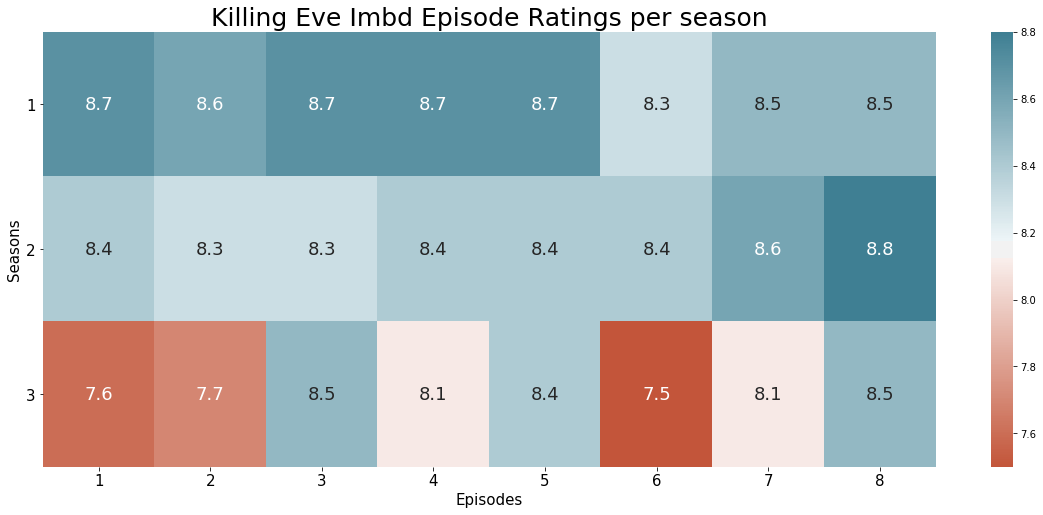

In [278]:
plt.figure(figsize=(20,8))
sns.heatmap(ratings,annot=True,cmap=palette,fmt='.2g',annot_kws={'size':18})
plt.title('Killing Eve Imbd Episode Ratings per season',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15,rotation='horizontal')
plt.xlabel('Episodes', fontsize=15) 
plt.ylabel('Seasons', fontsize=15) 

(array([ 0.,  2.,  4.,  6.,  8., 10.]), <a list of 6 Text yticklabel objects>)

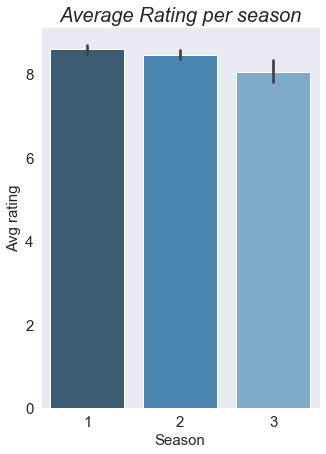

In [307]:
sns.set_style('dark')
plt.figure(figsize=(5,7))
sns.barplot(x='Season',y='Rating',data=df,palette="Blues_d")
plt.title('Average Rating per season',fontsize=20,fontstyle='italic')
plt.xlabel('Season',fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Avg rating',fontsize=15)
plt.yticks(fontsize=15)


In [316]:
df['Total Votes']=df['Total Votes'].str.strip('()')


In [326]:
df['Total Votes']=df['Total Votes'].str.replace((','),'')
df['Total Votes']=pd.to_numeric(df['Total Votes'])

Text(0, 0.5, 'Total Votes')

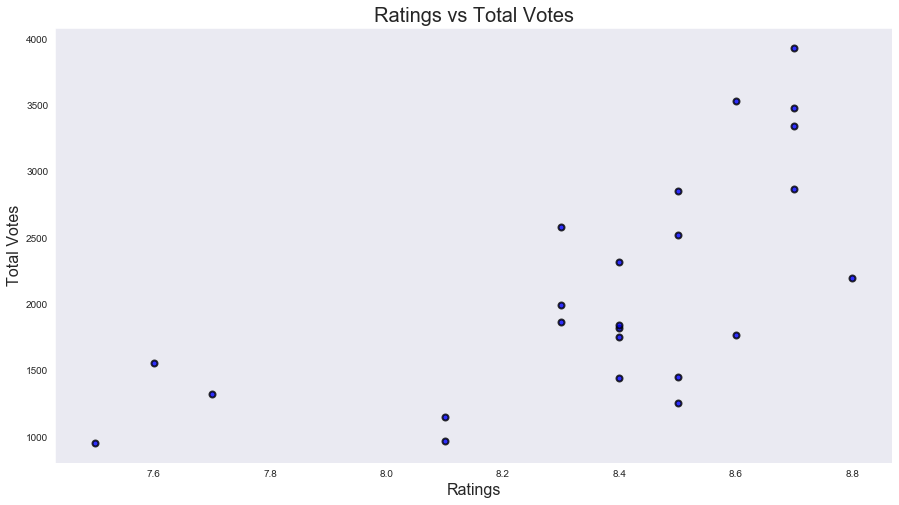

In [362]:
plt.figure(figsize=(15,8))
plt.scatter(x='Rating',y='Total Votes',data=df,linewidth=2,color='blue',alpha=0.8,edgecolors='black')
plt.title('Ratings vs Total Votes',fontsize=20)
plt.xlabel('Ratings',fontsize=16)
plt.ylabel('Total Votes',fontsize=16)